Deep learning with Pytorch 

In [1]:
#creating a tensor using pytorch
import torch
x=torch.tensor([1,2,3])
print(x)


tensor([1, 2, 3])


In [2]:
import torch
print(torch.__version__)

2.6.0+cpu


In [3]:
#MLP with one hidden layer
import torch.nn as nn
import torch.nn.functional as F
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(MLP,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)#input layer to hidden layer
        self.fc2=nn.Linear(hidden_size,num_classes)#hidden layer to op
        
    def forward(self,x):
        x=F.relu(self.fc1(x))#passes the input x through the first layer and applies relu function to its output
        x=self.fc2(x)#passes the input throught the second layer 
        return x
    

In [ ]:
#defining the dataset
import torchvision
import torchvision.transforms as transform
from torch.utils.data import DataLoader
#define the transformation that you need to do to the image before passing it to the model
transform=transform.Compose([
    transform.ToTensor(),#converts image to tensors
    transform.Normalize((0.5,),(0.5))#sets mean and std to 0.5 each and normalizes the data
])

#defining the dataset 
train_dataset=torchvision.datasets.MNIST(
    root='./data',#sets location
    train=True,#loads training set
    transform=transform,#applies the above given transform
    download=True#downloads if not availaible
)

train_loader=DataLoader(
    dataset=train_dataset,#uses the above specified training dataset
    batch_size=64,#loads data in batches
    shuffle=True,#shuffles the data
    num_workers=2#cpu threads 2
)

In [29]:
model=MLP(input_size=784,hidden_size=500,num_classes=10)#define the model
crit=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)#optimizer with learning rate
loss_values=[]
num_epochs=2#since it takes a while to run
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28)
        
        #forward
        outputs=model(images)
        loss=crit(outputs,labels)
        
        #backward
        optimizer.zero_grad()#all gradients set to zero
        loss.backward()#gradients using back propogation
        optimizer.step()
        loss_values.append(loss.item())
        print(f'Epoch[{epoch+1}/{num_epochs}],step[{i+1}/{len(train_loader)}],loss:[{loss.item()}]')
        
        

Epoch[1/2],step[1/938],loss:[2.3635523319244385]
Epoch[1/2],step[2/938],loss:[2.330333709716797]
Epoch[1/2],step[3/938],loss:[2.3092613220214844]
Epoch[1/2],step[4/938],loss:[2.290588617324829]
Epoch[1/2],step[5/938],loss:[2.2770607471466064]
Epoch[1/2],step[6/938],loss:[2.2599828243255615]
Epoch[1/2],step[7/938],loss:[2.2411844730377197]
Epoch[1/2],step[8/938],loss:[2.232952356338501]
Epoch[1/2],step[9/938],loss:[2.212550401687622]
Epoch[1/2],step[10/938],loss:[2.1832451820373535]
Epoch[1/2],step[11/938],loss:[2.1799564361572266]
Epoch[1/2],step[12/938],loss:[2.164332151412964]
Epoch[1/2],step[13/938],loss:[2.1602942943573]
Epoch[1/2],step[14/938],loss:[2.166463613510132]
Epoch[1/2],step[15/938],loss:[2.1493358612060547]
Epoch[1/2],step[16/938],loss:[2.169624090194702]
Epoch[1/2],step[17/938],loss:[2.1476504802703857]
Epoch[1/2],step[18/938],loss:[2.16963529586792]
Epoch[1/2],step[19/938],loss:[2.153775691986084]
Epoch[1/2],step[20/938],loss:[2.070028781890869]
Epoch[1/2],step[21/938]

In [27]:
#metrics for the training
testloss=0
correct=0
for images,labels in train_loader:
    images=images.reshape(-1,28*28)
    outputs=model(images)
    loss=crit(outputs,labels)
    testloss+=loss.item()
    predicted=outputs.argmax(1)#gets the predicted class from the output
    correct+=(predicted==labels).sum()
testloss/=len(train_loader)#we shouldnt use train_loader we shoudl define test loader with unseen data done this for simplicity
accuracy=100.*correct/len(train_loader.dataset)#same here as well
    

In [28]:
print(testloss)
print(accuracy)

0.32705132264508874
tensor(90.7300)


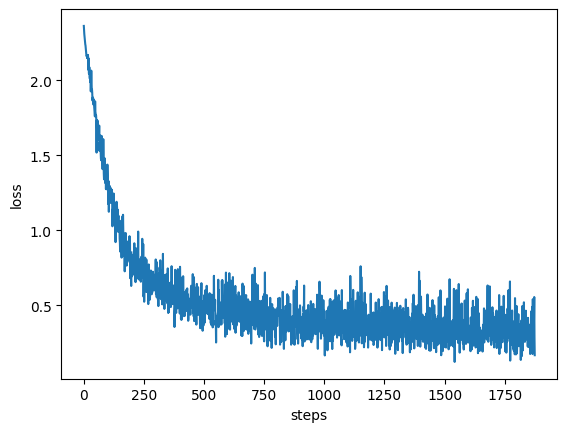

In [31]:
#monitoring and plotting the loss values
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

In [32]:
#incase u want to use a different optimizer you can go to the training code and make the optimizer variable this
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)